Deep Belief Network (DBN) - Test 4

In [1]:
from torchvision import datasets, transforms
from torchvision.datasets import MNIST, FashionMNIST
from torch.utils.data import DataLoader

from DBN import DBN

import matplotlib.pyplot as plt
import torch
import pandas as pd
import torch.nn as nn

In [2]:
def greedy_layer_wise_training(dbn_model, train_loader, test_loader, lr, epochs = 5):
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(dbn_model.parameters(), lr=lr)

    details = []
    for epoch in range(epochs):
        dbn_model.train()

        total_loss = 0
        batches = 0
        for x, y in train_loader:
            x = x.view(x.size(0), -1)

            logits = dbn_model(x)
            loss = criterion(logits, y)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            total_loss += loss.item()
            batches += 1

        avg_loss = total_loss / batches


        dbn_model.eval()
        correct = 0
        total = 0
        test_batches = 0
        with torch.no_grad():
            for x, y in test_loader:
                x = x.view(x.size(0), -1)

                logits = dbn_model(x)
                preds = logits.argmax(dim = 1)

                correct += (preds == y).sum().item()
                total += y.size(0)

                test_batches += 1

        acc = correct/total

        details.append({'epoch': epoch + 1, 'train_loss': avg_loss, 'test_accuracy': acc})

        print(f"Epoch {epoch + 1}/{epochs} - train loss: {avg_loss:.4f} - test acc: {acc:.4f}")

    return dbn_model, pd.DataFrame(details)

DBN with 2 hidden-layers

In [3]:
transform = transforms.ToTensor()
train_dataset = datasets.FashionMNIST(root="./data", train=True, transform=transform, download=True)
test_dataset  = datasets.FashionMNIST(root="./data", train=False, transform=transform, download=True)

train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True,  drop_last=True)
test_loader  = DataLoader(test_dataset,  batch_size=512, shuffle=False)

model = DBN(layers=[28*28, 500, 500], lr=0.05, cd_k=1, category='p')

training_details_2h = model.pre_training(train_loader, epochs_per_layer=10)

lr = 1e-3

dbn_model = model.build_classifier(10)

dbn_model, complete_details_2h = greedy_layer_wise_training(dbn_model, train_loader, test_loader, lr, epochs = 15)

RBM 1 Training:
  Epoch 1/10 - loss: 0.3353
  Epoch 2/10 - loss: 0.3179
  Epoch 3/10 - loss: 0.3082
  Epoch 4/10 - loss: 0.3018
  Epoch 5/10 - loss: 0.2972
  Epoch 6/10 - loss: 0.2937
  Epoch 7/10 - loss: 0.2909
  Epoch 8/10 - loss: 0.2886
  Epoch 9/10 - loss: 0.2867
  Epoch 10/10 - loss: 0.2850
RBM 2 Training:
  Epoch 1/10 - loss: 0.4363
  Epoch 2/10 - loss: 0.4166
  Epoch 3/10 - loss: 0.4059
  Epoch 4/10 - loss: 0.3989
  Epoch 5/10 - loss: 0.3939
  Epoch 6/10 - loss: 0.3901
  Epoch 7/10 - loss: 0.3871
  Epoch 8/10 - loss: 0.3848
  Epoch 9/10 - loss: 0.3828
  Epoch 10/10 - loss: 0.3812
Epoch 1/15 - train loss: 0.7329 - test acc: 0.8571
Epoch 2/15 - train loss: 0.3649 - test acc: 0.8683
Epoch 3/15 - train loss: 0.3105 - test acc: 0.8676
Epoch 4/15 - train loss: 0.2821 - test acc: 0.8786
Epoch 5/15 - train loss: 0.2586 - test acc: 0.8805
Epoch 6/15 - train loss: 0.2351 - test acc: 0.8743
Epoch 7/15 - train loss: 0.2237 - test acc: 0.8804
Epoch 8/15 - train loss: 0.2048 - test acc: 0.879

DBN with 4 hidden layers

In [4]:
transform = transforms.ToTensor()
train_dataset = datasets.FashionMNIST(root="./data", train=True, transform=transform, download=True)
test_dataset  = datasets.FashionMNIST(root="./data", train=False, transform=transform, download=True)

train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True,  drop_last=True)
test_loader  = DataLoader(test_dataset,  batch_size=512, shuffle=False)

model = DBN(layers=[28*28, 500, 500, 250, 250], lr=0.05, cd_k=1, category='p')

training_details_4h = model.pre_training(train_loader, epochs_per_layer=10)

lr = 1e-3

dbn_model = model.build_classifier(10)

dbn_model, complete_details_4h = greedy_layer_wise_training(dbn_model, train_loader, test_loader, lr, epochs = 15)

RBM 1 Training:
  Epoch 1/10 - loss: 0.3358
  Epoch 2/10 - loss: 0.3182
  Epoch 3/10 - loss: 0.3085
  Epoch 4/10 - loss: 0.3021
  Epoch 5/10 - loss: 0.2975
  Epoch 6/10 - loss: 0.2940
  Epoch 7/10 - loss: 0.2912
  Epoch 8/10 - loss: 0.2889
  Epoch 9/10 - loss: 0.2870
  Epoch 10/10 - loss: 0.2853
RBM 2 Training:
  Epoch 1/10 - loss: 0.4364
  Epoch 2/10 - loss: 0.4168
  Epoch 3/10 - loss: 0.4061
  Epoch 4/10 - loss: 0.3990
  Epoch 5/10 - loss: 0.3941
  Epoch 6/10 - loss: 0.3903
  Epoch 7/10 - loss: 0.3874
  Epoch 8/10 - loss: 0.3850
  Epoch 9/10 - loss: 0.3831
  Epoch 10/10 - loss: 0.3814
RBM 3 Training:
  Epoch 1/10 - loss: 0.3786
  Epoch 2/10 - loss: 0.3590
  Epoch 3/10 - loss: 0.3492
  Epoch 4/10 - loss: 0.3428
  Epoch 5/10 - loss: 0.3382
  Epoch 6/10 - loss: 0.3348
  Epoch 7/10 - loss: 0.3322
  Epoch 8/10 - loss: 0.3301
  Epoch 9/10 - loss: 0.3284
  Epoch 10/10 - loss: 0.3269
RBM 4 Training:
  Epoch 1/10 - loss: 0.3332
  Epoch 2/10 - loss: 0.3017
  Epoch 3/10 - loss: 0.2857
  Epoch 4

DBN with 6 hidden layers

In [5]:
transform = transforms.ToTensor()
train_dataset = datasets.FashionMNIST(root="./data", train=True, transform=transform, download=True)
test_dataset  = datasets.FashionMNIST(root="./data", train=False, transform=transform, download=True)

train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True,  drop_last=True)
test_loader  = DataLoader(test_dataset,  batch_size=512, shuffle=False)

model = DBN(layers=[28*28, 500, 500, 250, 250, 125, 125], lr=0.05, cd_k=1, category='p')

training_details_6h = model.pre_training(train_loader, epochs_per_layer=10)

lr = 1e-3

dbn_model = model.build_classifier(10)

dbn_model, complete_details_6h = greedy_layer_wise_training(dbn_model, train_loader, test_loader, lr, epochs = 15)

RBM 1 Training:
  Epoch 1/10 - loss: 0.3358
  Epoch 2/10 - loss: 0.3183
  Epoch 3/10 - loss: 0.3085
  Epoch 4/10 - loss: 0.3020
  Epoch 5/10 - loss: 0.2973
  Epoch 6/10 - loss: 0.2938
  Epoch 7/10 - loss: 0.2910
  Epoch 8/10 - loss: 0.2887
  Epoch 9/10 - loss: 0.2868
  Epoch 10/10 - loss: 0.2851
RBM 2 Training:
  Epoch 1/10 - loss: 0.4321
  Epoch 2/10 - loss: 0.4121
  Epoch 3/10 - loss: 0.4013
  Epoch 4/10 - loss: 0.3942
  Epoch 5/10 - loss: 0.3891
  Epoch 6/10 - loss: 0.3853
  Epoch 7/10 - loss: 0.3824
  Epoch 8/10 - loss: 0.3800
  Epoch 9/10 - loss: 0.3780
  Epoch 10/10 - loss: 0.3764
RBM 3 Training:
  Epoch 1/10 - loss: 0.3801
  Epoch 2/10 - loss: 0.3604
  Epoch 3/10 - loss: 0.3504
  Epoch 4/10 - loss: 0.3441
  Epoch 5/10 - loss: 0.3396
  Epoch 6/10 - loss: 0.3362
  Epoch 7/10 - loss: 0.3336
  Epoch 8/10 - loss: 0.3315
  Epoch 9/10 - loss: 0.3297
  Epoch 10/10 - loss: 0.3283
RBM 4 Training:
  Epoch 1/10 - loss: 0.3316
  Epoch 2/10 - loss: 0.3003
  Epoch 3/10 - loss: 0.2842
  Epoch 4

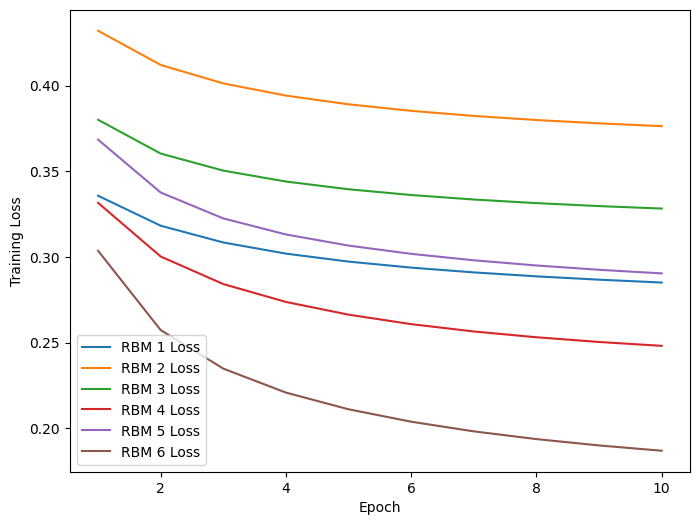

In [6]:
plt.figure(figsize=(8, 6))
for l_rbm in training_details_6h['rbm'].drop_duplicates().tolist():
    plt.plot(training_details_6h[training_details_6h['rbm'] == l_rbm]['epoch'], training_details_6h[training_details_6h['rbm'] == l_rbm]['loss'], label=f'RBM {l_rbm + 1} Loss')
plt.ylabel('Training Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

Text(0.5, 0, 'Epoch')

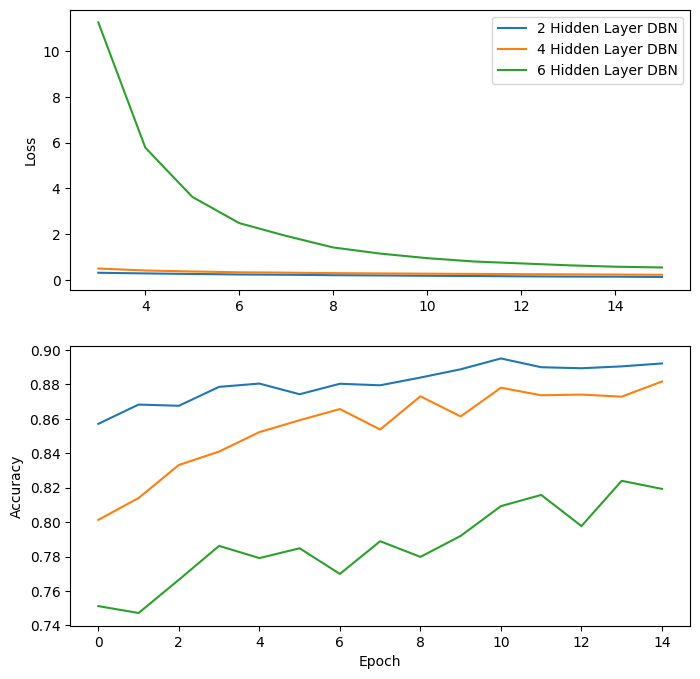

In [14]:
fig, axes = plt.subplots(2, 1, figsize=(8, 8))

axes[0].plot(complete_details_2h['epoch'].iloc[2:], complete_details_2h['train_loss'].iloc[2:], label='2 Hidden Layer DBN')
axes[0].plot(complete_details_4h['epoch'].iloc[2:], complete_details_4h['train_loss'].iloc[2:], label='4 Hidden Layer DBN')
axes[0].plot(complete_details_6h['epoch'].iloc[2:], complete_details_6h['train_loss'].iloc[2:], label='6 Hidden Layer DBN')
axes[0].set_ylabel('Loss')
axes[0].legend()

axes[1].plot(complete_details_2h['test_accuracy'], label='Accuracy')
axes[1].plot(complete_details_4h['test_accuracy'], label='Accuracy')
axes[1].plot(complete_details_6h['test_accuracy'], label='Accuracy')
axes[1].set_ylabel('Accuracy')
axes[1].set_xlabel('Epoch')